# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler


import warnings
warnings.filterwarnings('ignore')
wholesale_df = pd.read_csv(r'Wholesale_Data.csv')
wholesale_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# Number of rows and columns
wholesale_df.shape

(440, 8)

In [4]:
wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
wholesale_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


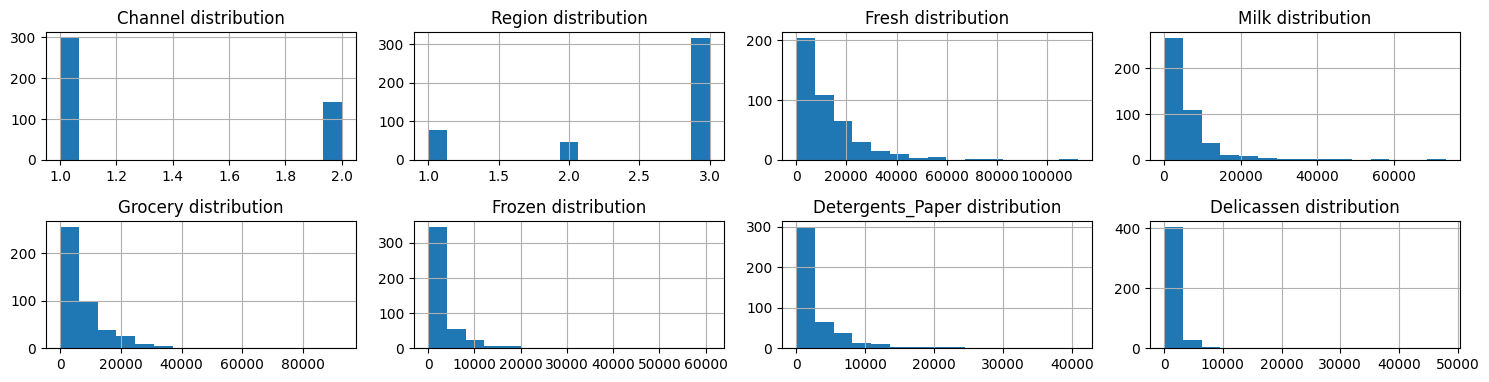

In [9]:
# histograms
def draw_histo(dataframe, features, rows, cols):
    
    fig = plt.figure(figsize=(15,15))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=15, ax=ax)
        ax.set_title(feature+' distribution')
    
    fig.tight_layout()
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.show()

draw_histo(wholesale_df, wholesale_df.columns, 8, 4)


In [10]:
# Check for missing values
wholesale_df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [11]:
# Check for Duplicate Rows
wholesale_df.duplicated().sum()

0

Count of customers by Channel: 
 Channel
1    298
2    142
Name: count, dtype: int64

Percentage of customers by Channel: 
 Channel
1    67.727273
2    32.272727
Name: proportion, dtype: float64


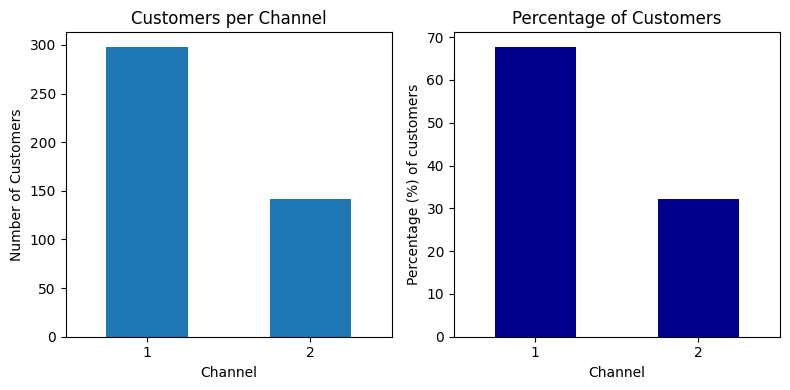

In [19]:
# Calculate customers per each channel type
c_counts = wholesale_df['Channel'].value_counts().sort_values(ascending=False)
print('Count of customers by Channel: \n', c_counts)

# Calculate percentages of customers per each channel type
c_perc = wholesale_df['Channel'].value_counts(normalize=True).sort_values(ascending=False) * 100
print('\nPercentage of customers by Channel: \n', c_perc)

# Plot Customers
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
c_counts.plot(kind='bar')
plt.title('Customers per Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Plot percentages
plt.subplot(1, 2, 2)
c_perc.plot(kind='bar', color='darkblue')
plt.title('Percentage of Customers')
plt.xlabel('Channel')
plt.ylabel('Percentage (%) of customers')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Customers per each region: 
 Region
3    316
1     77
2     47
Name: count, dtype: int64

Percentage of customers by region: 
 Region
3    71.818182
1    17.500000
2    10.681818
Name: proportion, dtype: float64


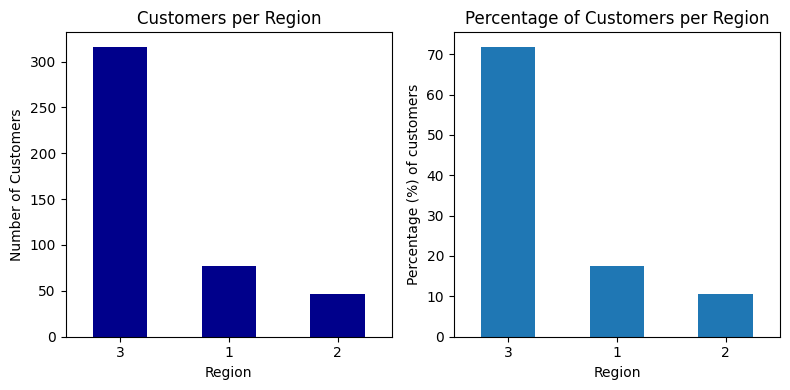

In [18]:
# Customers per each region
r_counts = wholesale_df['Region'].value_counts().sort_values(ascending=False)
print('Customers per each region: \n', r_counts)

# Percentages of customers per each region
r_perc = wholesale_df['Region'].value_counts(normalize=True).sort_values(ascending=False) * 100
print('\nPercentage of customers by region: \n', r_perc)

# Customers per each region
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
r_counts.plot(kind='bar',color='darkblue')
plt.title('Customers per Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Percentages of customers
plt.subplot(1, 2, 2)
r_perc.plot(kind='bar')
plt.title('Percentage of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Percentage (%) of customers')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

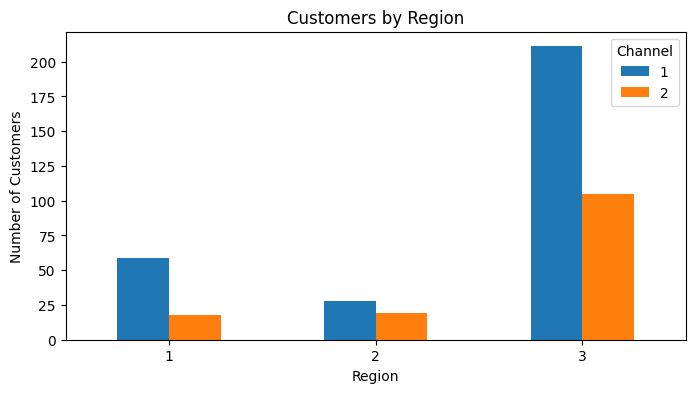

In [17]:
c_r_counts = wholesale_df.groupby(['Channel', 'Region']).size().unstack()
c_r_counts.T.plot(kind='bar', figsize=(8, 4))
plt.title('Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Channel')
plt.show()

In [20]:
# Select numeric columns
numeric_cols = wholesale_df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].columns.tolist()
print(numeric_cols)

# Select Categorical columns
cat_cols = wholesale_df[['Channel', 'Region']].columns.tolist()
print(cat_cols)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
['Channel', 'Region']


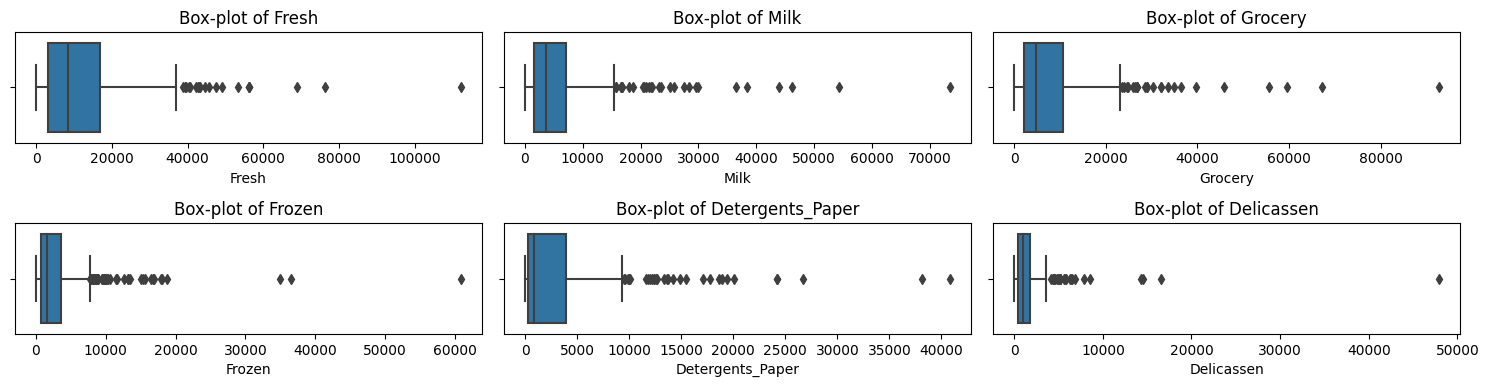

In [22]:
# Boxplots for numeric columns  - Dectect outliers
def draw_boxplot(dataframe, features, rows, cols):
    
    fig = plt.figure(figsize=(15,15))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        sns.boxplot(data=dataframe, x=dataframe[feature])
        ax.set_title('Box-plot of '+ feature)
    
    fig.tight_layout()
    plt.show()
    
draw_boxplot(wholesale_df, wholesale_df[numeric_cols], 8, 3)

In [23]:
wholesale_df.shape

(440, 8)

In [25]:
# Remove outliers
def rem_outliers(dataframe, col):

    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]

# Applying the function numerical columns
for col in wholesale_df[numeric_cols].columns:
    wholesale_df = rem_outliers(wholesale_df, col)
wholesale_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


In [26]:
# Copy 'wholesale_df' into the X features set
X = wholesale_df.copy()
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


In [34]:
# Feature selection Process
X_selected = wholesale_df.copy()
X_selected

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


In [35]:
X_selected = X_selected.drop(columns=['Channel'])
X_selected

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
5,3,9413,8259,5126,666,1795,1451
6,3,12126,3199,6975,480,3140,545
7,3,7579,4956,9426,1669,3321,2566
...,...,...,...,...,...,...,...
432,3,21117,1162,4754,269,1328,395
433,3,1982,3218,1493,1541,356,1449
434,3,16731,3922,7994,688,2371,838
438,3,10290,1981,2232,1038,168,2125


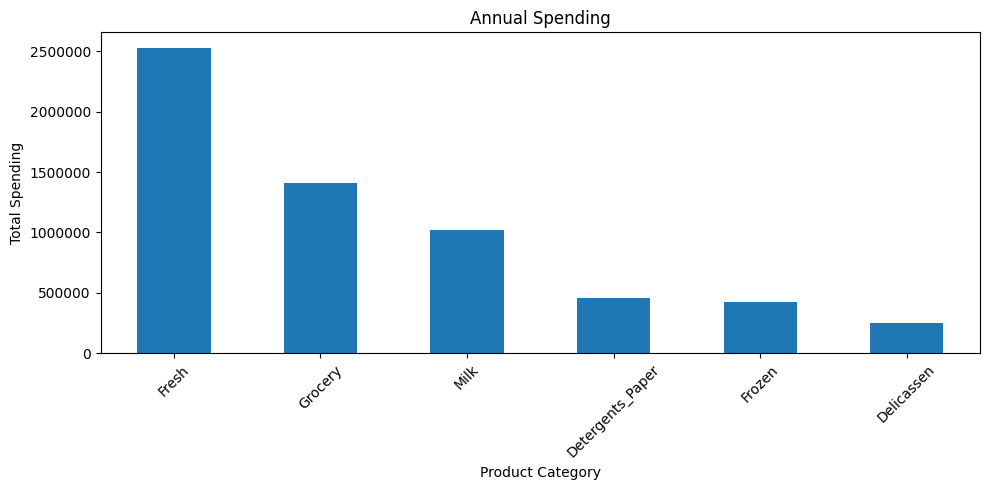

In [37]:
# Calculate the sum of annual spending per each product category
category_sums = X[numeric_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
category_sums.plot(kind='bar')
plt.title('Annual Spending')
plt.ylabel('Total Spending')
plt.xlabel('Product Category')

# y-axis formatter to ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

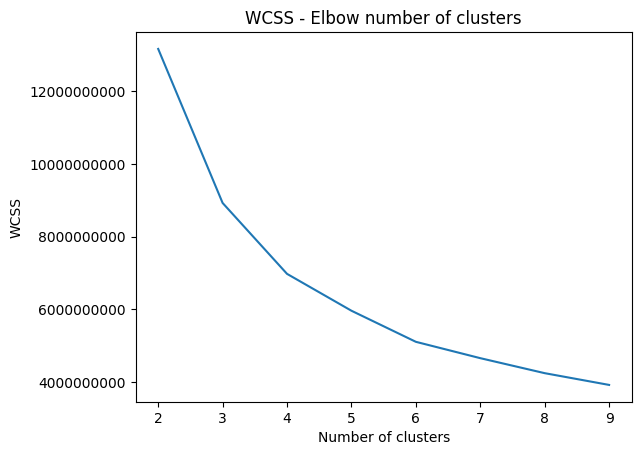

In [38]:
# Using the elbow method to find the optimal number of clusters
elbow_wcss = []

for i in range(2, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    elbow_wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), elbow_wcss)
plt.title('WCSS - Elbow number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [39]:
kmeans1 = KMeans(n_clusters = 7, init = "k-means++", random_state = 42)
kmeans1.fit(X)

KMeans(n_clusters=7, random_state=42)

In [40]:
kmeans1.inertia_

4651214199.050207

In [42]:
# Save the predicted cluster labels of X into a variable
pred1_cluster_labels_k = kmeans1.predict(X)
pred1_cluster_labels_k

array([3, 6, 3, 3, 3, 3, 6, 4, 5, 5, 1, 6, 3, 4, 1, 4, 1, 4, 0, 2, 0, 6,
       5, 4, 3, 3, 3, 1, 0, 6, 2, 0, 4, 3, 3, 3, 0, 0, 5, 1, 3, 4, 1, 0,
       1, 3, 4, 3, 1, 6, 0, 0, 0, 0, 6, 6, 4, 4, 6, 6, 1, 5, 4, 4, 1, 1,
       1, 4, 1, 4, 0, 1, 3, 5, 0, 0, 4, 1, 1, 1, 6, 6, 0, 4, 2, 4, 1, 1,
       1, 4, 0, 4, 0, 0, 4, 6, 6, 1, 4, 6, 0, 1, 1, 6, 0, 0, 6, 3, 3, 0,
       3, 6, 0, 1, 0, 6, 6, 4, 1, 1, 6, 3, 1, 0, 0, 1, 0, 0, 4, 1, 6, 6,
       6, 4, 0, 4, 6, 1, 4, 5, 0, 0, 0, 2, 0, 4, 0, 1, 4, 1, 2, 4, 3, 6,
       1, 4, 4, 0, 5, 3, 1, 1, 2, 0, 6, 4, 0, 6, 0, 0, 2, 5, 0, 3, 1, 4,
       0, 1, 0, 6, 2, 1, 4, 3, 3, 0, 4, 6, 6, 4, 1, 2, 1, 3, 1, 0, 1, 0,
       1, 4, 3, 2, 0, 0, 0, 1, 2, 5, 4, 6, 6, 0, 0, 6, 6, 5, 0, 0, 0, 0,
       2, 0, 4, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 6, 2, 0, 1, 0, 4, 1, 1,
       0, 0, 1, 1, 6, 1, 1, 0, 2, 2, 4, 1, 3, 1, 6, 3, 6, 6, 1, 6, 5, 2,
       4, 5, 5, 0, 1, 6, 4, 0, 4, 1, 0])

In [45]:
# Merge pred1_cluster_labels
X['Cluster_k'] = pred1_cluster_labels_k
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_k
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,6
5,2,3,9413,8259,5126,666,1795,1451,3
6,2,3,12126,3199,6975,480,3140,545,3
7,2,3,7579,4956,9426,1669,3321,2566,3


In [46]:
# Run K-means model on the 'X_selected' with selected features set with n_clusters = 6:
kmeans2 = KMeans(n_clusters = 6, init = "k-means++", random_state = 42)
kmeans2.fit(X_selected)

KMeans(n_clusters=6, random_state=42)

In [47]:
kmeans2.inertia_

5101546168.821515

In [48]:
# Save the predicted cluster labels of X_selected into a variable
pred2_cluster_labels_k = kmeans2.predict(X_selected)
pred2_cluster_labels_k

array([0, 2, 5, 0, 2, 5, 2, 5, 0, 4, 5, 2, 2, 3, 5, 0, 5, 3, 1, 3, 1, 2,
       0, 3, 0, 0, 0, 5, 1, 2, 4, 1, 3, 2, 5, 2, 1, 1, 0, 5, 2, 3, 5, 1,
       5, 0, 3, 5, 5, 2, 1, 2, 1, 1, 2, 2, 3, 3, 2, 2, 5, 0, 3, 3, 5, 5,
       5, 3, 5, 3, 1, 5, 0, 0, 1, 1, 3, 5, 5, 5, 2, 2, 1, 3, 4, 3, 5, 5,
       5, 3, 1, 3, 1, 1, 3, 2, 2, 5, 3, 2, 1, 5, 1, 2, 2, 1, 2, 5, 5, 1,
       0, 2, 1, 5, 1, 2, 2, 3, 1, 5, 2, 5, 5, 1, 1, 5, 2, 1, 3, 5, 2, 2,
       2, 3, 1, 3, 2, 5, 5, 0, 1, 1, 2, 4, 1, 3, 1, 5, 3, 5, 4, 3, 5, 2,
       5, 3, 3, 1, 4, 5, 5, 5, 3, 1, 2, 3, 1, 2, 1, 1, 4, 0, 1, 0, 5, 3,
       1, 5, 1, 2, 3, 5, 3, 5, 2, 1, 0, 2, 2, 3, 5, 4, 5, 5, 5, 1, 5, 1,
       5, 3, 0, 4, 1, 1, 1, 5, 3, 4, 3, 2, 2, 2, 1, 2, 2, 4, 1, 1, 1, 1,
       3, 1, 3, 1, 1, 1, 1, 5, 1, 3, 5, 5, 5, 1, 2, 4, 1, 5, 1, 3, 5, 5,
       1, 1, 5, 5, 2, 5, 5, 1, 4, 4, 3, 5, 5, 5, 2, 2, 2, 2, 5, 2, 0, 4,
       3, 0, 0, 1, 5, 2, 3, 1, 0, 5, 1])

In [49]:
# Merge pred1_cluster_labels
X_selected['Cluster_k'] = pred2_cluster_labels_k
X_selected.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_k
0,3,12669,9656,7561,214,2674,1338,0
1,3,7057,9810,9568,1762,3293,1776,2
5,3,9413,8259,5126,666,1795,1451,5
6,3,12126,3199,6975,480,3140,545,0
7,3,7579,4956,9426,1669,3321,2566,2


In [50]:
# Use boolean comparison between cluster labels of customers from X and X_selected and sum up the True values.
(X['Cluster_k'] == X_selected['Cluster_k']).sum()

2

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

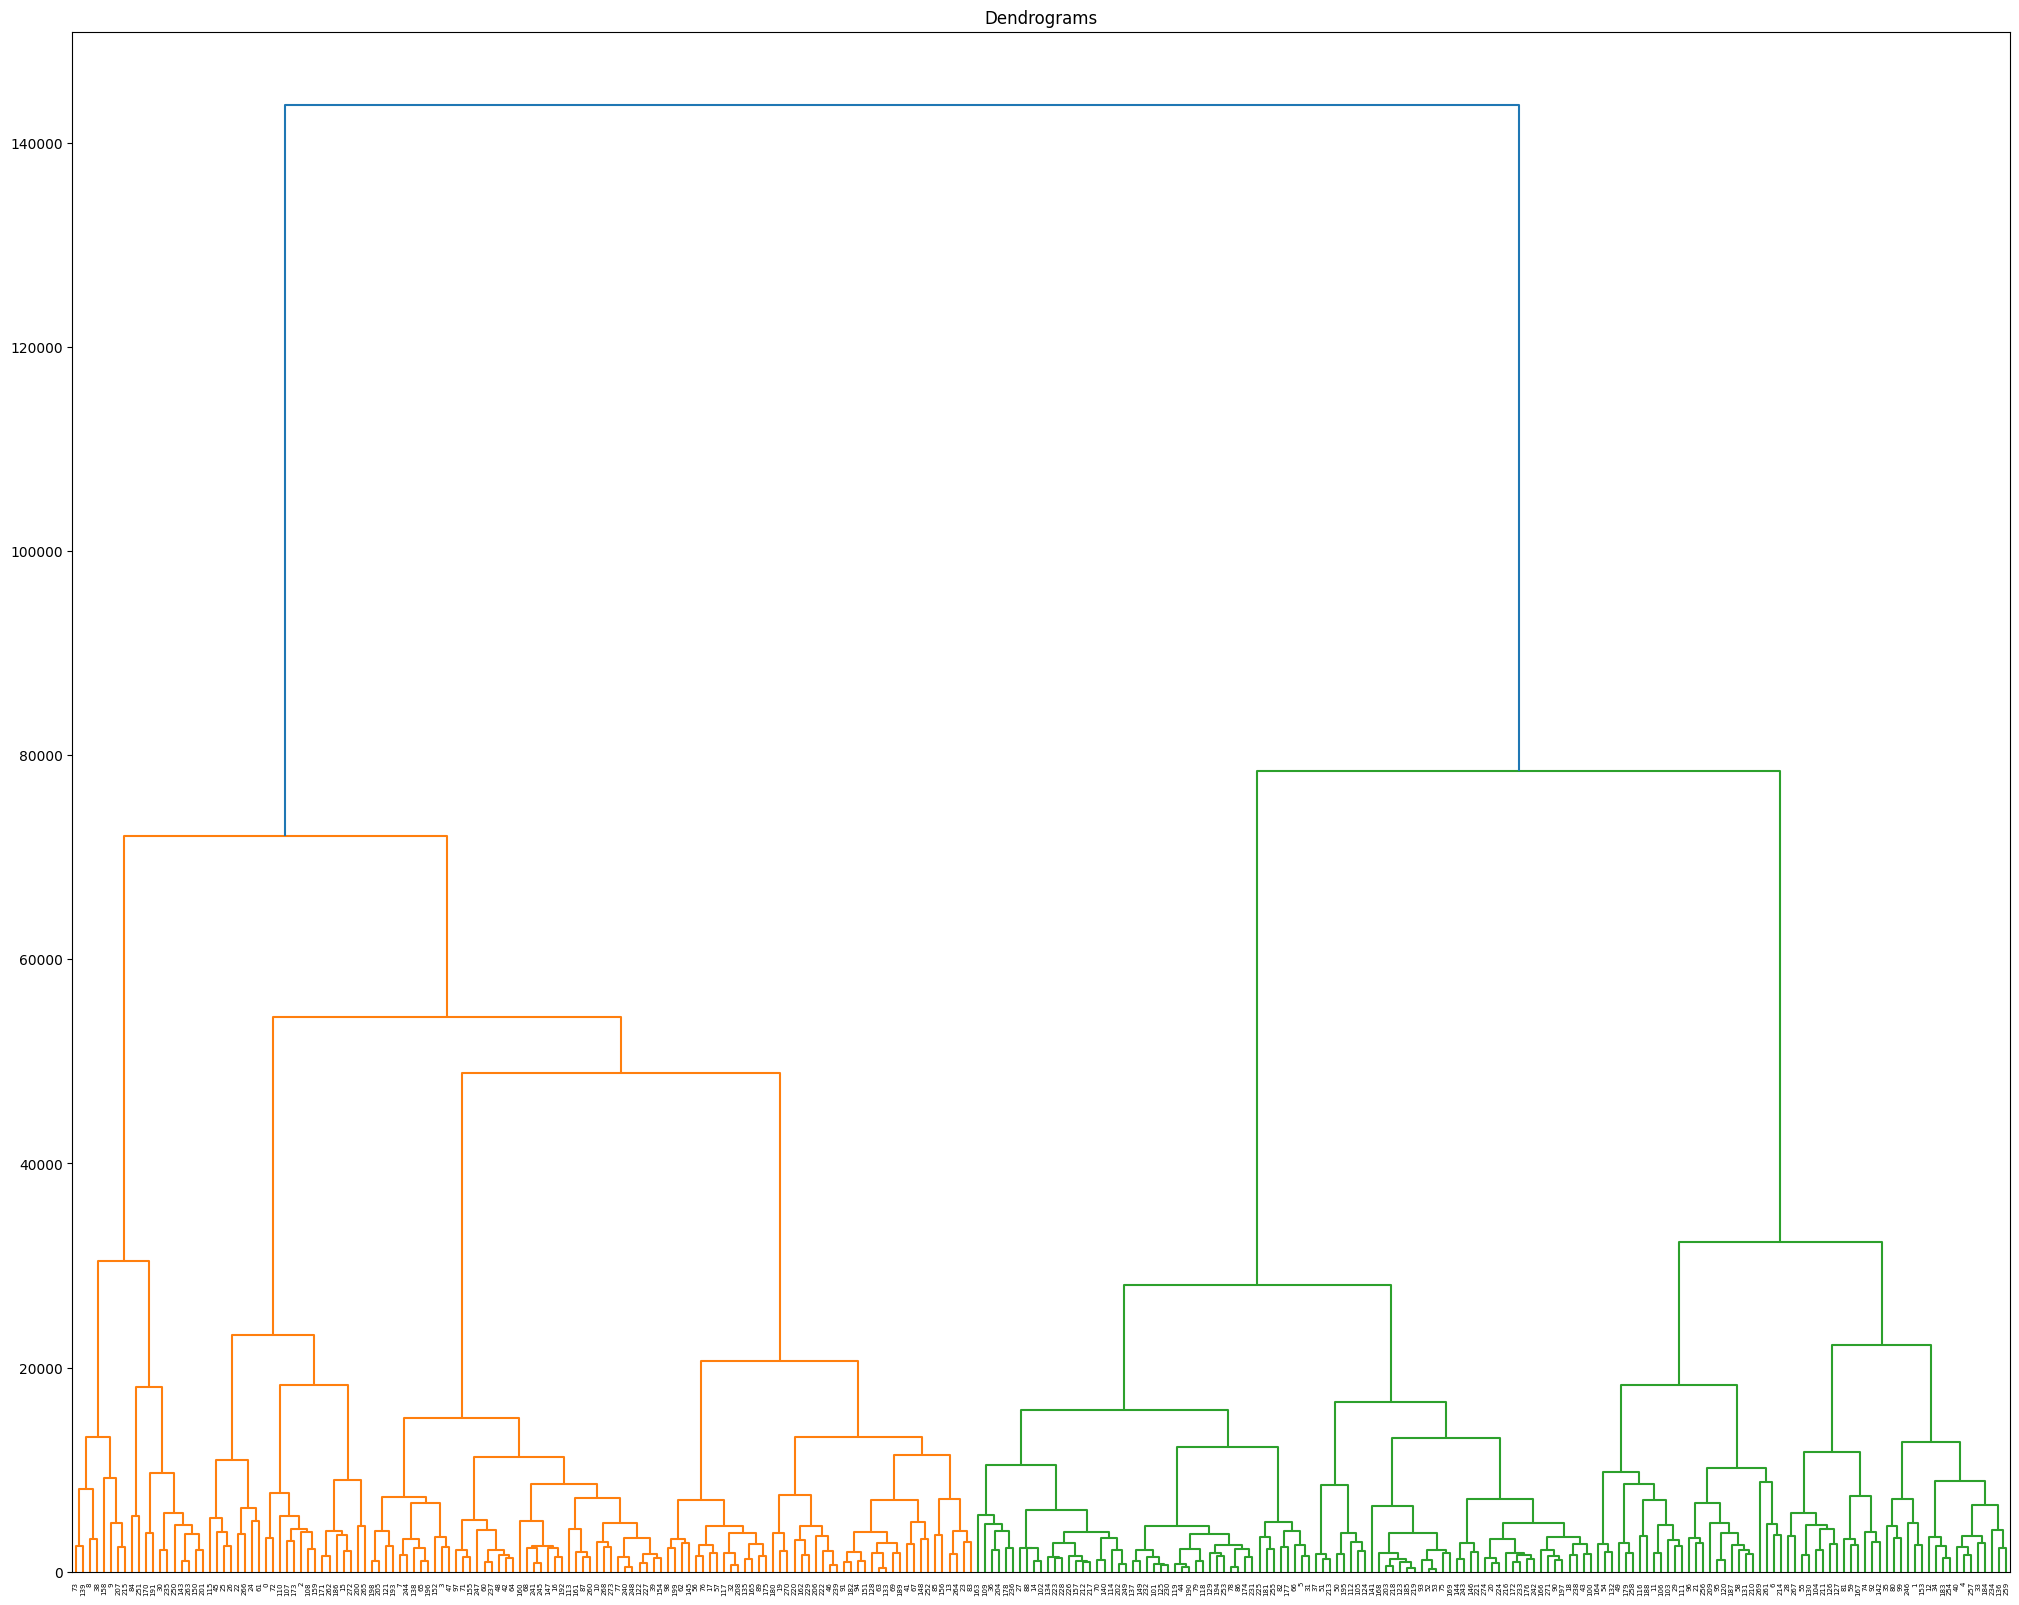

In [51]:
# Dendrogram for X
plt.figure(figsize=(25, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.show()

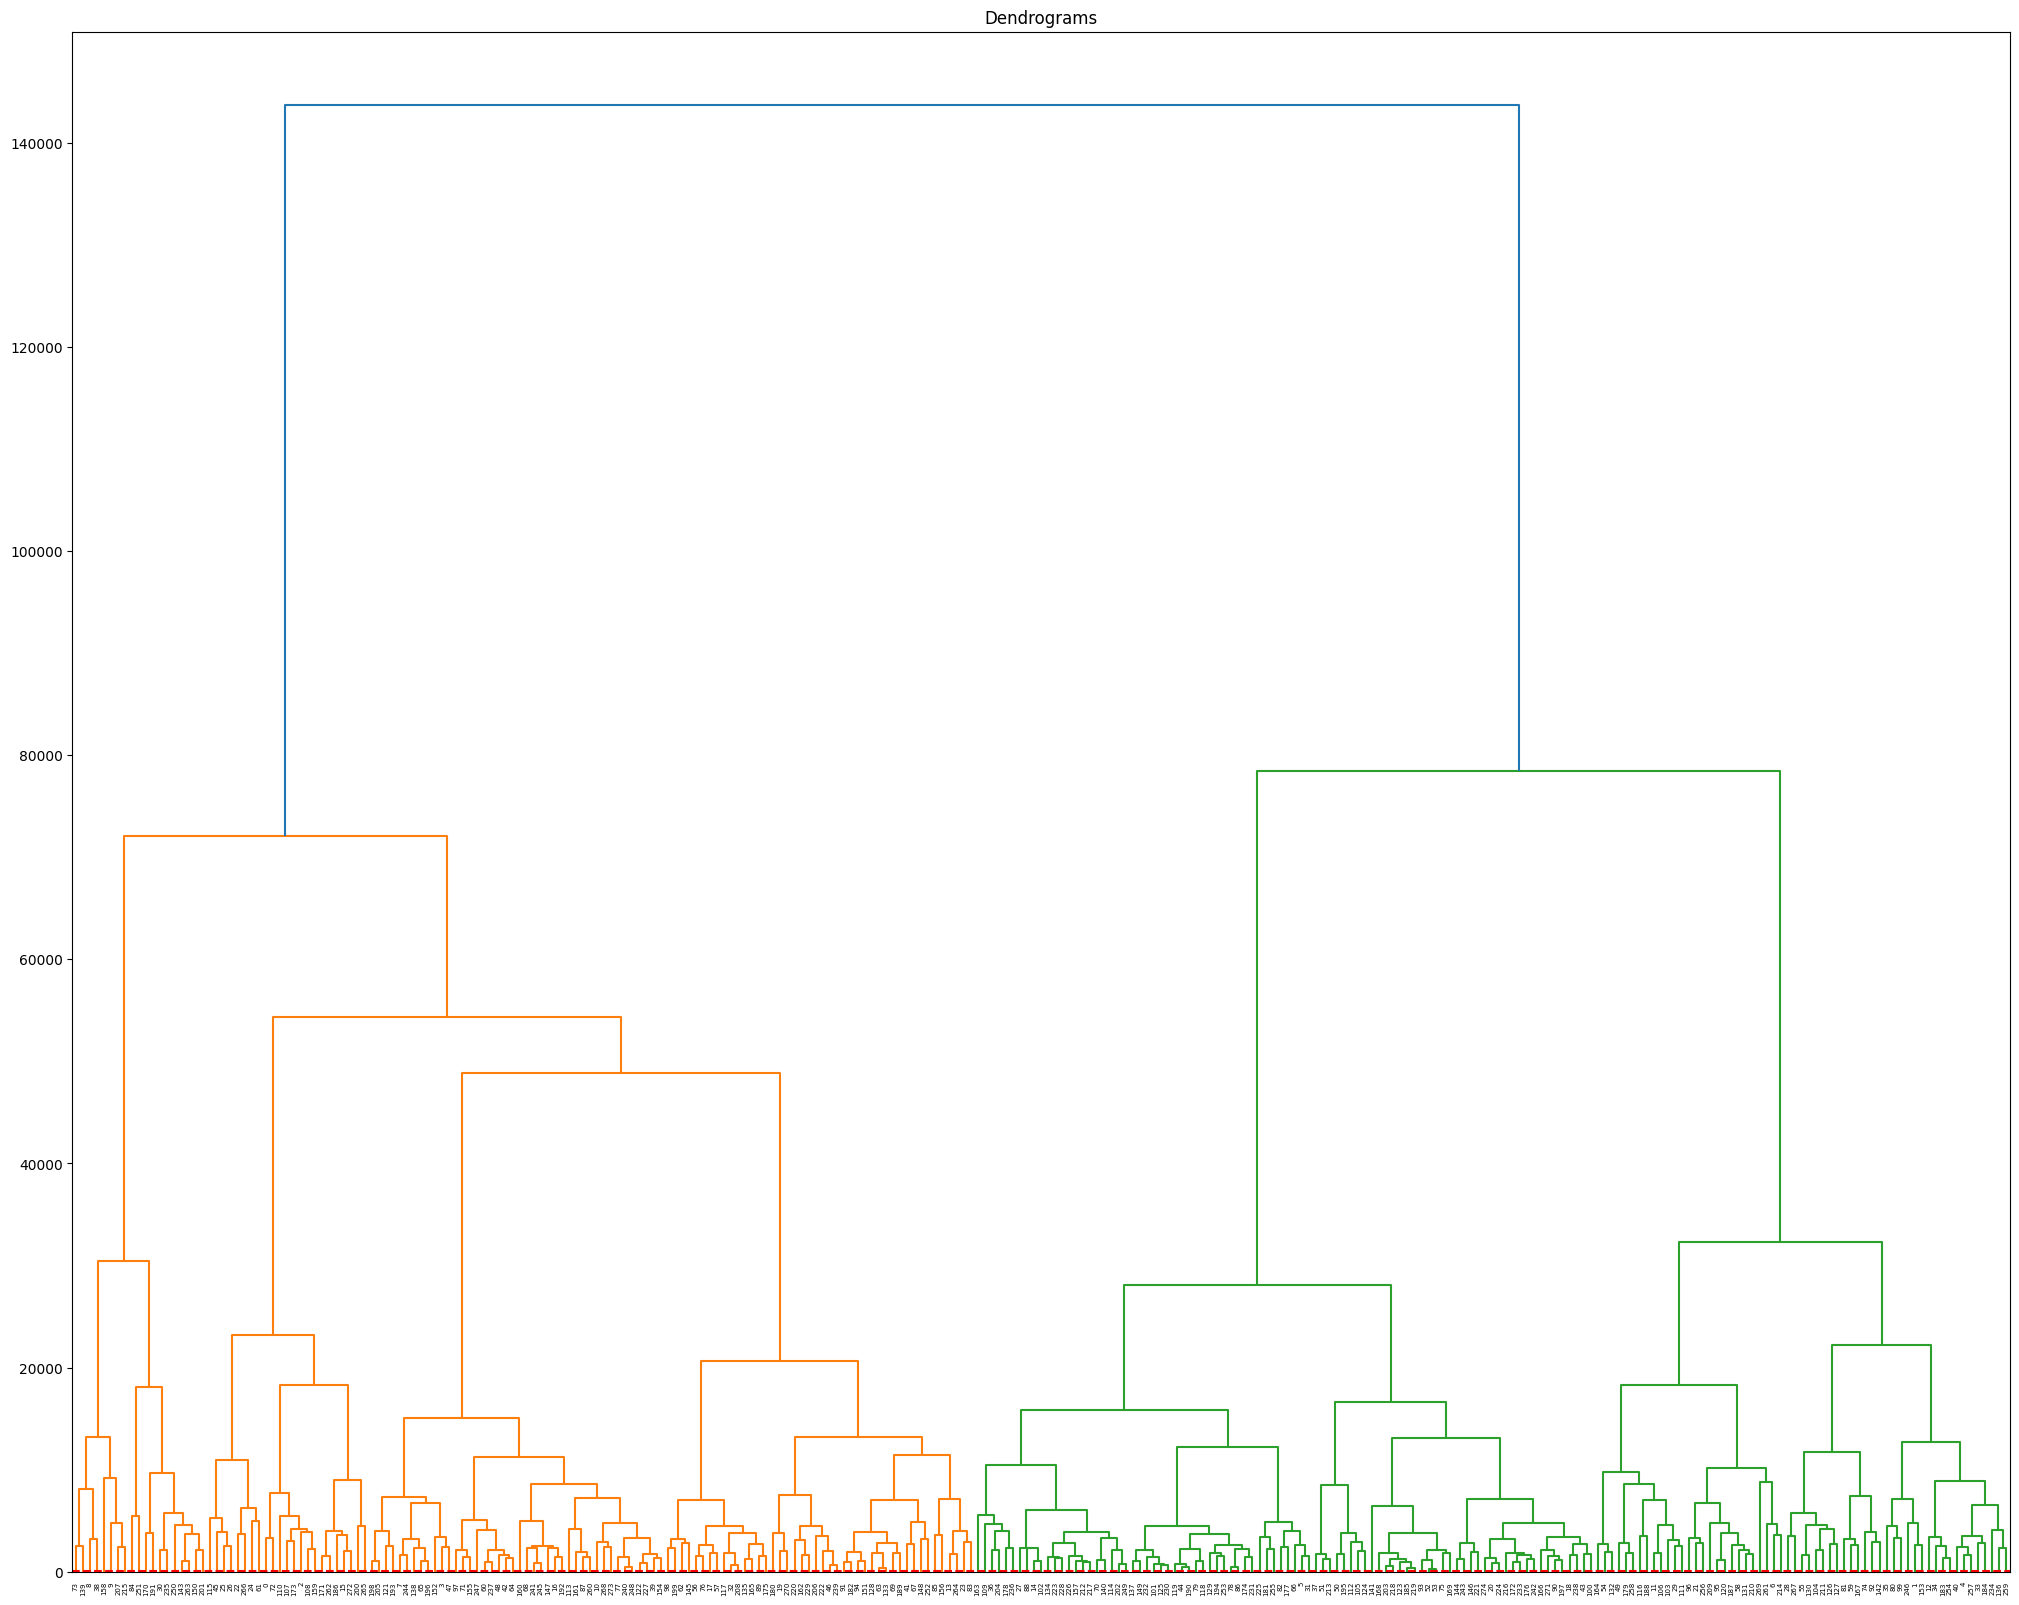

In [52]:
# Draw the second dendrogram for X
plt.figure(figsize=(25, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=40, color='r', linestyle='--')
plt.show()

In [54]:
# Hierarchical clustering
h_cluster1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
h_cluster1.fit(X)

AgglomerativeClustering(affinity='euclidean')

In [55]:
# Save the predicted cluster labels of X into a variable
pred1_cluster_labels_h = h_cluster1.fit_predict(X)
pred1_cluster_labels_h

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [56]:
X['Cluster_h'] = pred1_cluster_labels_h
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_k,Cluster_h
0,2,3,12669,9656,7561,214,2674,1338,3,1
1,2,3,7057,9810,9568,1762,3293,1776,6,0
5,2,3,9413,8259,5126,666,1795,1451,3,1
6,2,3,12126,3199,6975,480,3140,545,3,1
7,2,3,7579,4956,9426,1669,3321,2566,3,0


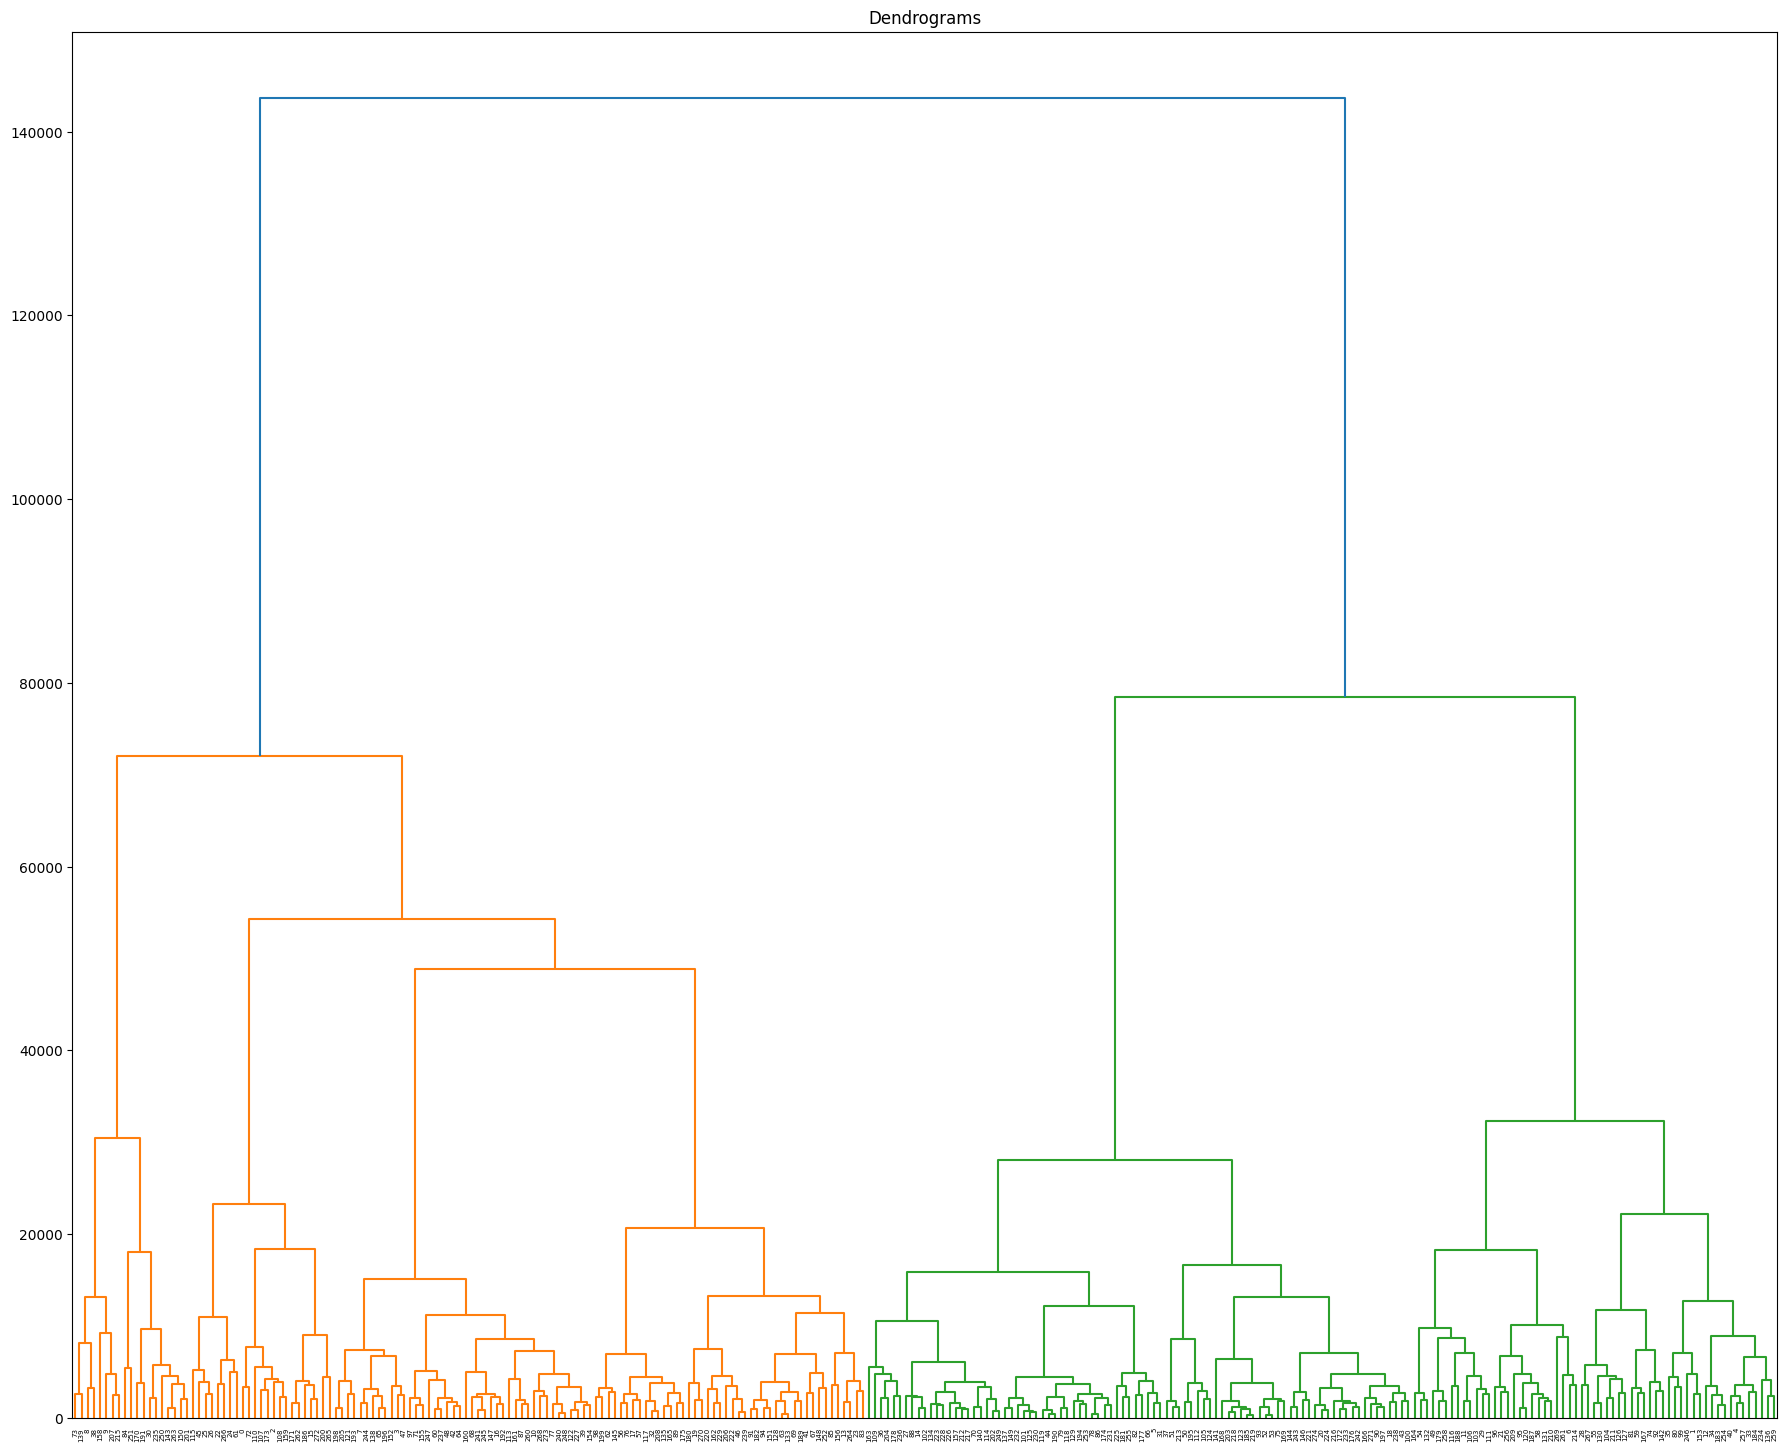

In [57]:
# Draw the first dendrogram for X_selected
plt.figure(figsize=(22, 18))  
plt.title("Dendrograms")  
dend2 = shc.dendrogram(shc.linkage(X_selected, method='ward')) 
plt.show()

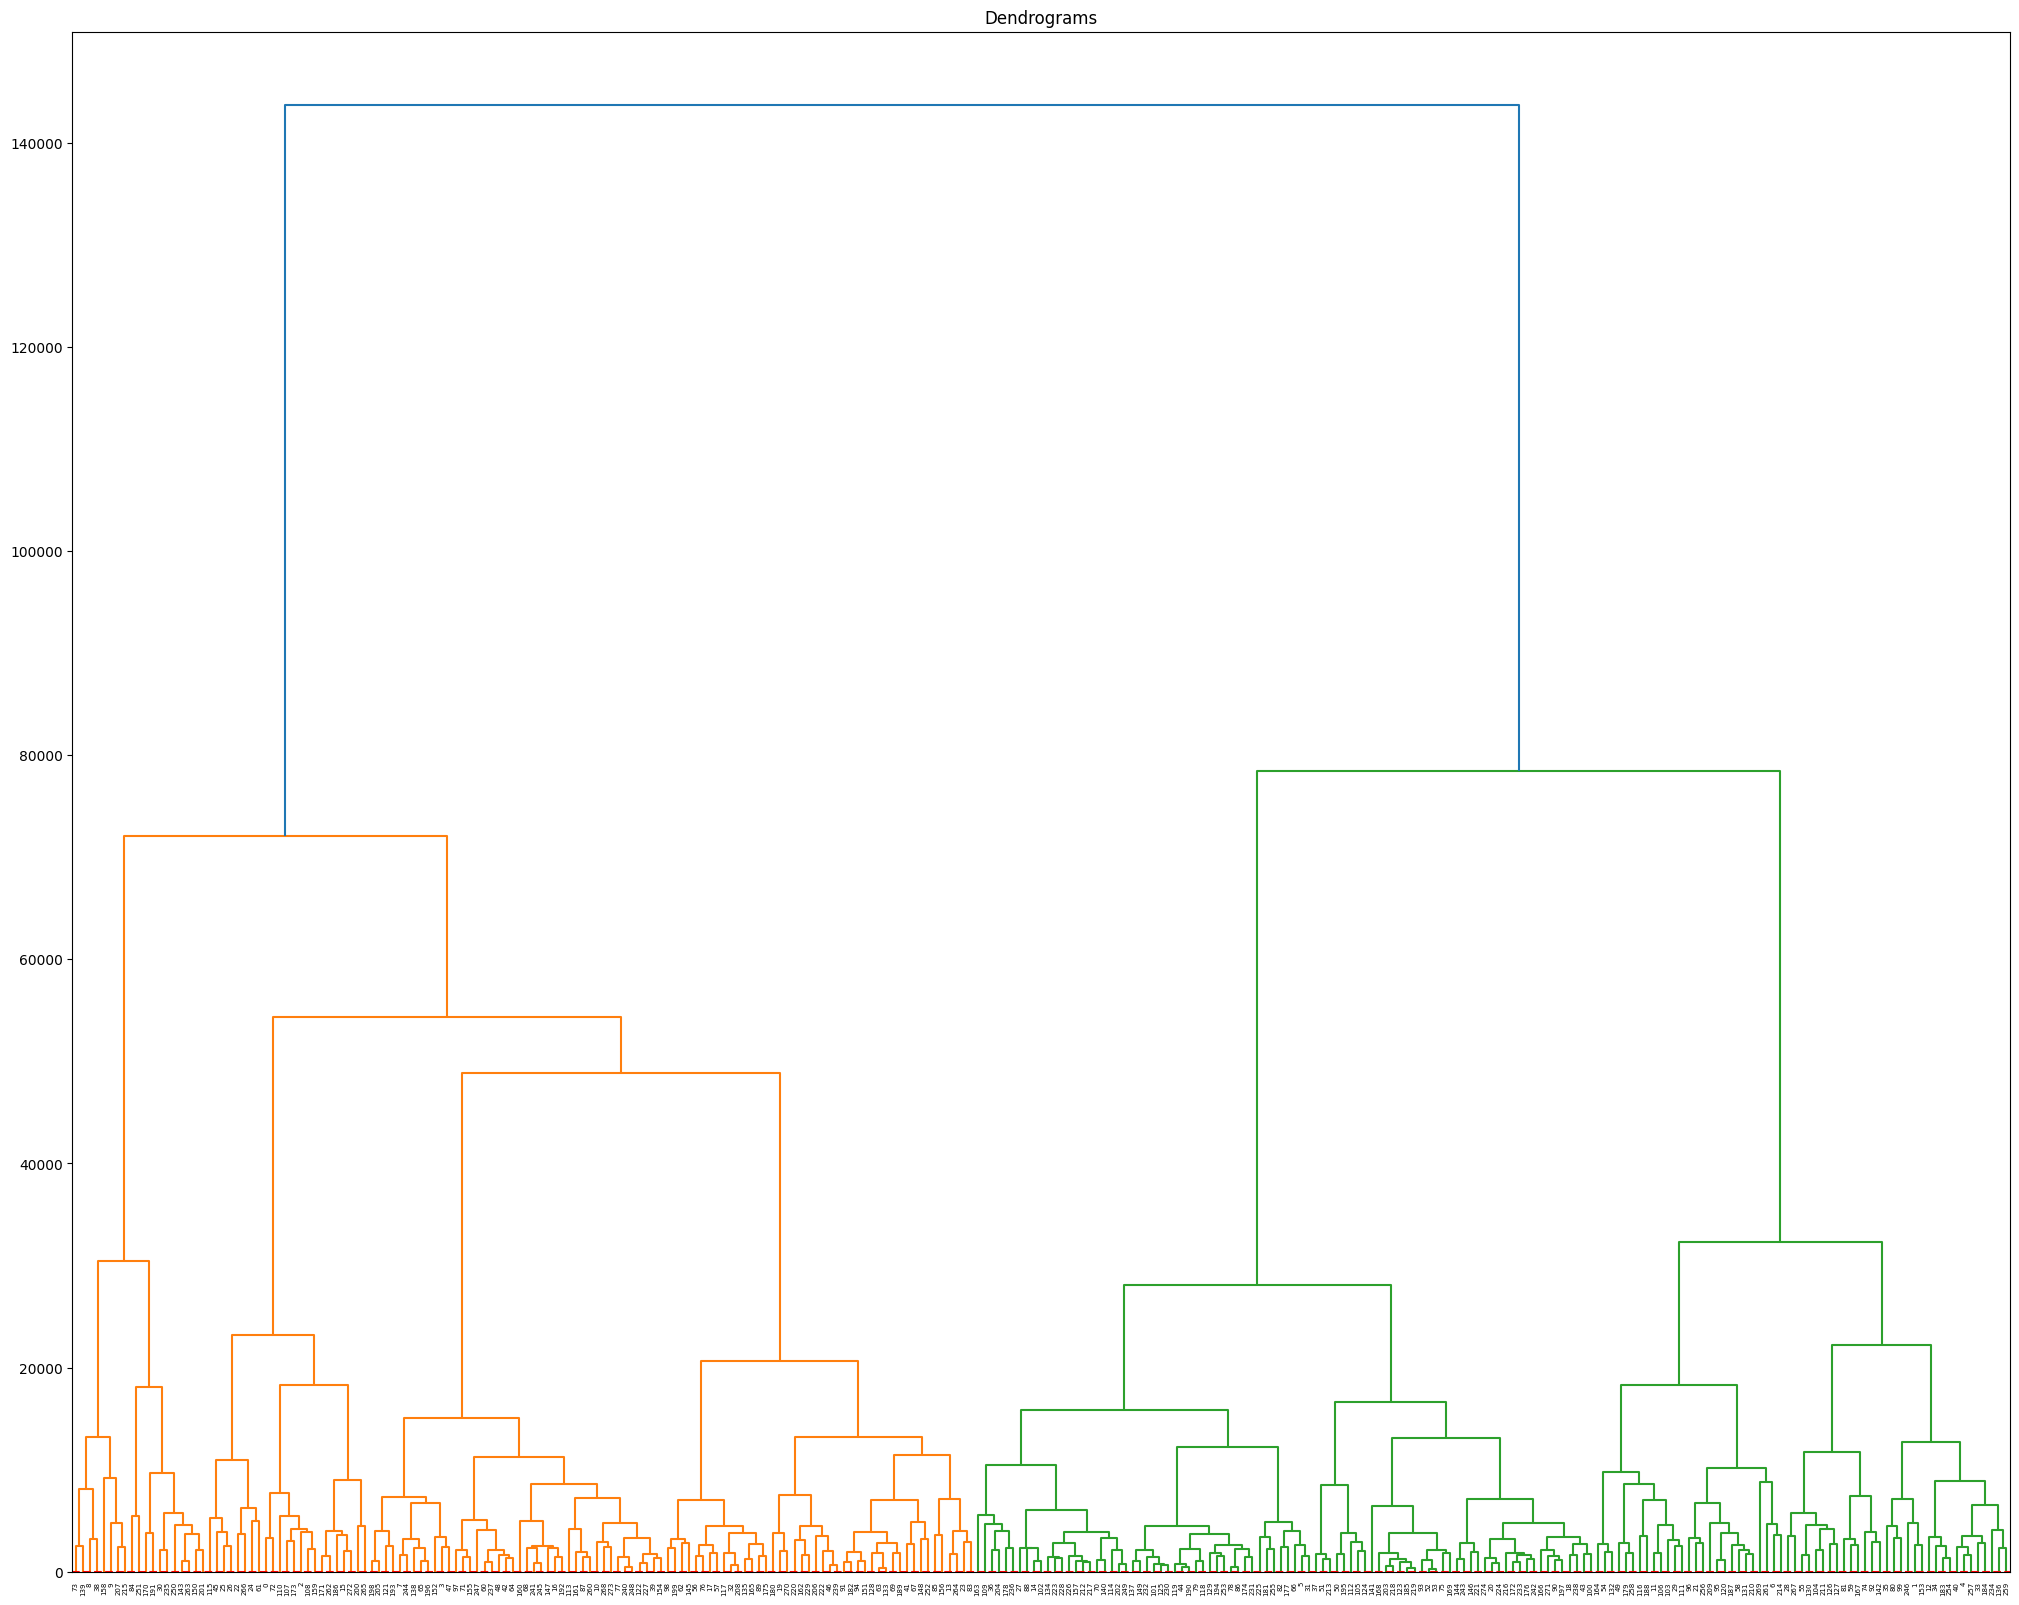

In [58]:
# Draw the second dendrogram for X_selected
plt.figure(figsize=(25, 20))  
plt.title("Dendrograms")  
dend2 = shc.dendrogram(shc.linkage(X_selected, method='ward'))
plt.axhline(y=25, color='r', linestyle='--')
plt.show()

In [ ]:
# Merge pred1_cluster_labels with our X_selected features data set
X_selected['Cluster_h'] = pred2_cluster_labels_h

# View the first 5 rows of the X_selected data set now with the cluster labels merged
X_selected.head()

In [ ]:
# Use boolean comparison between cluster labels of customers from X and X_selected and sum up the True values.
(X['Cluster_h'] == X_selected['Cluster_h']).sum()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [60]:
# Drop the cluster labels we added to X
X = X.drop(columns=['Cluster_k', 'Cluster_h'])

Eigenvalues:
[5.63308898e+07 2.53875633e+07 3.52732430e+06 1.43963124e+06
 1.04417097e+06 3.90627646e+05 5.97137530e-01 7.41201801e-02]

Variances (Percentage):
[6.39250532e+01 2.88101491e+01 4.00285517e+00 1.63371294e+00
 1.18493929e+00 4.43289519e-01 6.77639719e-07 8.41125796e-08]



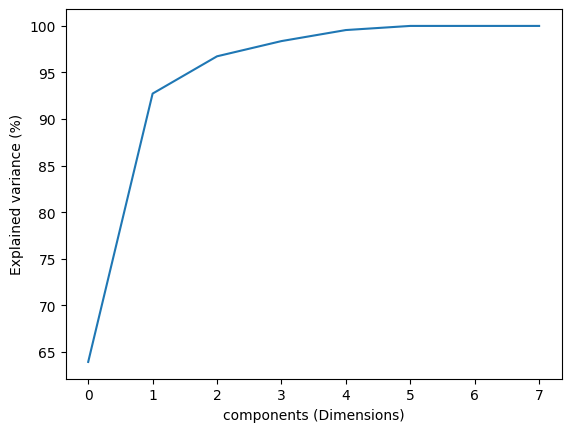

In [62]:
# Apply PCA on X - the full features data set
pca = PCA(n_components=None)
pca.fit(X)

# Eigenvalues
print('Eigenvalues:')
print(pca.explained_variance_)
print()

# Explained variances
print('Variances (Percentage):')
print(pca.explained_variance_ratio_ * 100)
print()

# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('components (Dimensions)')
plt.ylabel('Explained variance (%)')
plt.show()

In [63]:
# Take the abs of pca.components_
pca_components = abs(pca.components_)
print(pca_components)

[[4.59441825e-06 4.43832506e-06 9.94446779e-01 5.14565803e-02
  5.54042320e-02 4.01761958e-02 5.99667618e-02 1.21678506e-02]
 [6.05710313e-05 7.91161696e-06 9.15764349e-02 5.11906570e-01
  7.85837461e-01 5.14679911e-02 3.27779538e-01 4.40059368e-02]
 [8.76527301e-06 3.39105590e-06 7.76207329e-03 8.53254718e-01
  4.87489186e-01 4.48677748e-02 1.77049004e-01 2.98489939e-02]
 [2.30603835e-05 2.89782076e-05 2.58533563e-02 5.56247689e-02
  7.94500671e-02 9.60133075e-01 2.53074738e-01 6.34257824e-02]
 [1.12699265e-04 1.38097486e-05 4.37611221e-02 2.92828742e-02
  3.58653359e-01 2.46400060e-01 8.79536152e-01 1.85198273e-01]
 [2.41878837e-05 2.30707815e-05 6.75864963e-03 5.75210279e-02
  8.24597127e-02 1.05618606e-01 1.41377257e-01 9.79133917e-01]
 [6.13815315e-02 9.98114375e-01 2.20119928e-06 7.05258400e-07
  4.04020720e-06 3.47122470e-05 1.94955416e-05 1.87586115e-05]
 [9.98114367e-01 6.13815340e-02 5.22708789e-06 2.04371964e-05
  7.64629056e-06 8.97777441e-06 1.29106817e-04 5.48093996e-06]]

In [65]:
# Features in the decreasing importance sequence in each component
print('Features in importance sequence')
print('------------------------------')
for row in range(pca_components.shape[0]):
    temp = np.argpartition(-(pca_components[row]), 7)
    indices = temp[np.argsort((-pca_components[row])[temp])][:8]
    print(f'Component {row}: {X.columns[indices].to_list()}')

Features in importance sequence
------------------------------
Component 0: ['Fresh', 'Detergents_Paper', 'Grocery', 'Milk', 'Frozen', 'Delicassen', 'Channel', 'Region']
Component 1: ['Grocery', 'Milk', 'Detergents_Paper', 'Fresh', 'Frozen', 'Delicassen', 'Channel', 'Region']
Component 2: ['Milk', 'Grocery', 'Detergents_Paper', 'Frozen', 'Delicassen', 'Fresh', 'Channel', 'Region']
Component 3: ['Frozen', 'Detergents_Paper', 'Grocery', 'Delicassen', 'Milk', 'Fresh', 'Region', 'Channel']
Component 4: ['Detergents_Paper', 'Grocery', 'Frozen', 'Delicassen', 'Fresh', 'Milk', 'Channel', 'Region']
Component 5: ['Delicassen', 'Detergents_Paper', 'Frozen', 'Grocery', 'Milk', 'Fresh', 'Channel', 'Region']
Component 6: ['Region', 'Channel', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Grocery', 'Fresh', 'Milk']
Component 7: ['Channel', 'Region', 'Detergents_Paper', 'Milk', 'Frozen', 'Grocery', 'Delicassen', 'Fresh']


In [66]:
# Apply PCA again with n_components=2
pca2 = PCA(n_components=3)
X_pca = pca2.fit_transform(X)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2
0,2893.742105,5703.545303,3800.035853
1,-2775.810980,6988.125429,2743.510737
2,-65.137067,2470.315661,3908.520647
3,2691.572775,1992.095898,-1546.085920
4,-1994.874973,4488.273961,-1302.116361


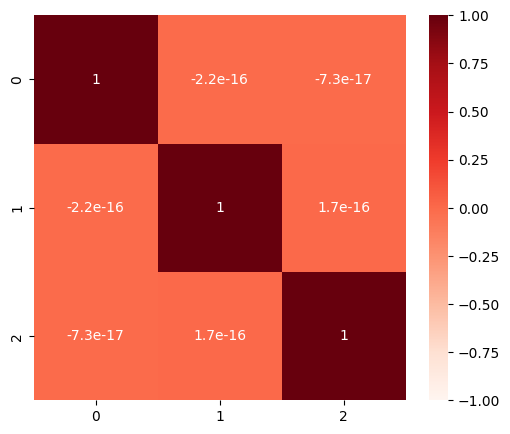

In [70]:
# Use a correlation matrix heatmap
plt.figure(figsize=(6, 5))
heatmap_pca = sns.heatmap(X_pca.corr(), vmin=-1, vmax=1, annot=True, cmap='Reds')
plt.show()

# Part V - Conclusion

**Conclusion from the exploratory data analysis (EDA)**:

* Channel wise, the majority of the wholesaler's clients belong to the Channel 1 as comapred to Chaneel 2. Around 68% of the customers of this wholesaler are from Channel 1, whereas only 32% are Channel 2.

* Region wise, the biggest chunk of clients of the wholesaler are aggregated into 'Region 3'.  72% the customer base of this wholesaler are densely located there. 

* We should re-categorizing client region. This will positively allow better insights into the regions and channels mapping, instead of having a big chunk of density amalgamation in 'One Region'.

* Product Category wise, there are 5 product categories 'Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen'. The distributions of those categories reveals that the annual spending of those the majority of customers in our dataset have low to moderate spending. There are also a few outliers in such columns which represents a few clients who spend a lot. 

* From visualizations, we can see most spending on is on Fresh & Least on Delicassen